In [454]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [598]:
"""
    Downscale an image to a target resolution (below max_res), keeping aspect ratio.
    Returns the low-res and low-bitrate image image.
"""
def degrade_image(img, max_res=100, jpeg_quality=20):
    h, w = img.shape[:2]
    aspect_ratio = w/h

    if w > h:
        new_w = max_res
        new_h = int(new_w / aspect_ratio)
    else:
        new_h = max_res
        new_w = int(new_h * aspect_ratio)

    low_res = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), jpeg_quality]
    result, encimg = cv2.imencode('.jpg', low_res, encode_param)
    if result:
        low_res = cv2.imdecode(encimg, 1)
    
    return low_res

In [600]:
img = cv2.imread("data/normal/2.jpg")
low_res_img = degrade_image(img, max_res=55, jpeg_quality=80)

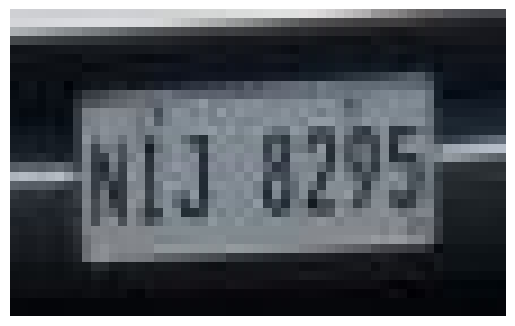

In [563]:
plt.imshow(cv2.cvtColor(low_res_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [641]:
out_dir = os.path.join('data', 'low_qual')
in_dir = os.path.join('data', 'normal')
files = os.listdir(in_dir)

min_rs = 40
max_rs = 70
min_qual = 20
max_qual = 60

69 43
Saved low quality plate: data\low_qual/1.jpg


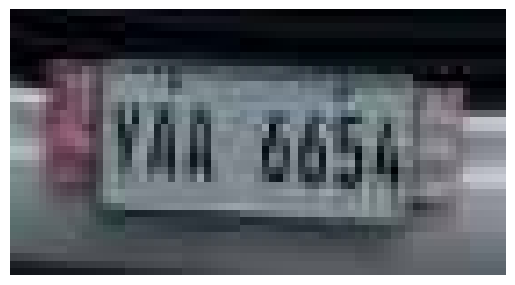

42 25
Saved low quality plate: data\low_qual/10.jpg


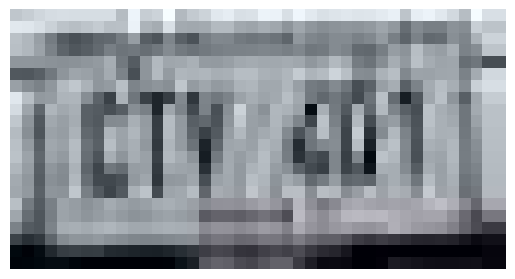

55 21
Saved low quality plate: data\low_qual/11.jpg


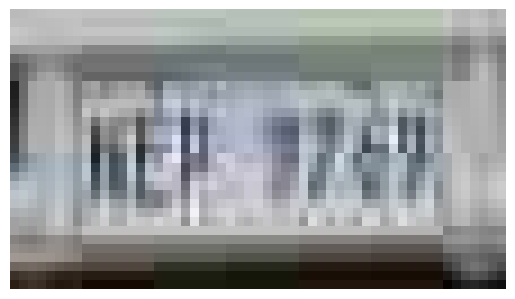

65 57
Saved low quality plate: data\low_qual/12.jpg


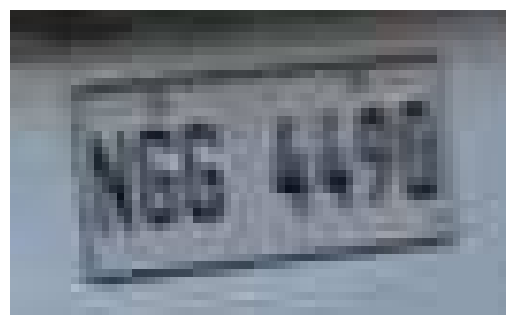

40 45
Saved low quality plate: data\low_qual/13.jpg


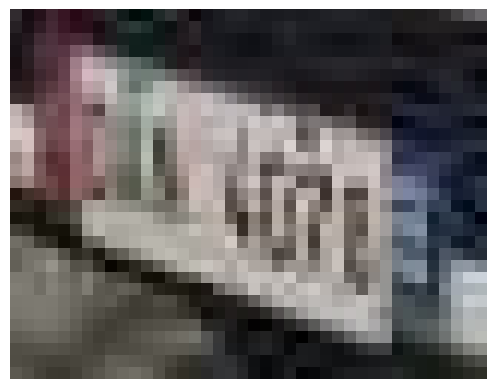

51 32
Saved low quality plate: data\low_qual/14.jpg


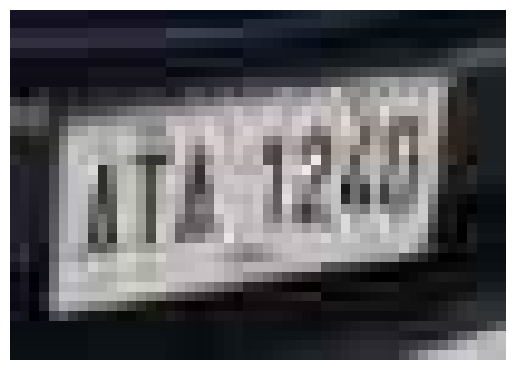

48 53
Saved low quality plate: data\low_qual/15.jpg


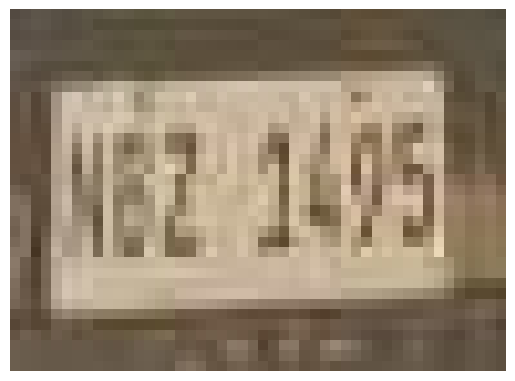

52 53
Saved low quality plate: data\low_qual/16.jpg


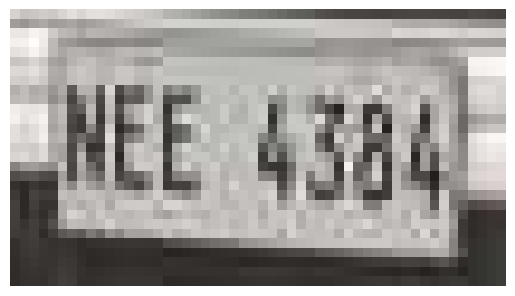

57 23
Saved low quality plate: data\low_qual/17.jpg


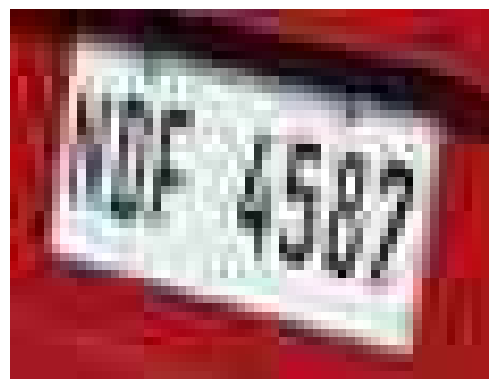

44 58
Saved low quality plate: data\low_qual/18.jpg


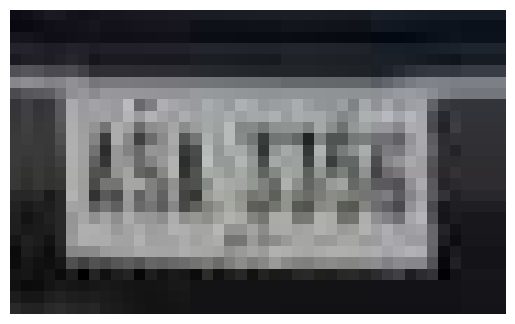

49 37
Saved low quality plate: data\low_qual/19.jpg


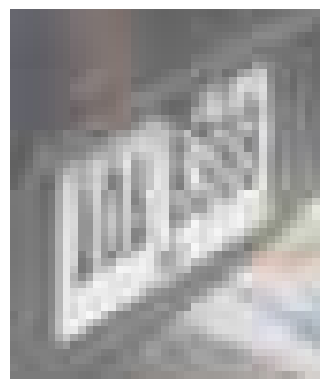

52 46
Saved low quality plate: data\low_qual/2.jpg


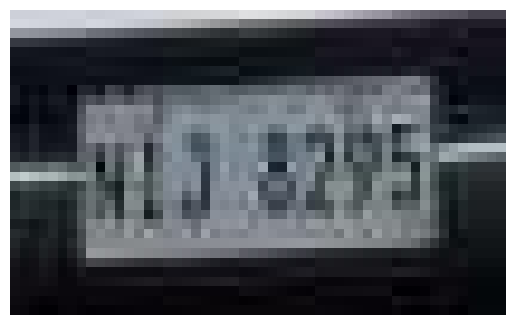

69 57
Saved low quality plate: data\low_qual/20.jpg


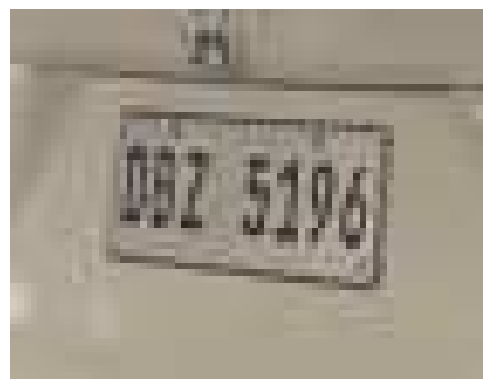

50 48
Saved low quality plate: data\low_qual/21.jpg


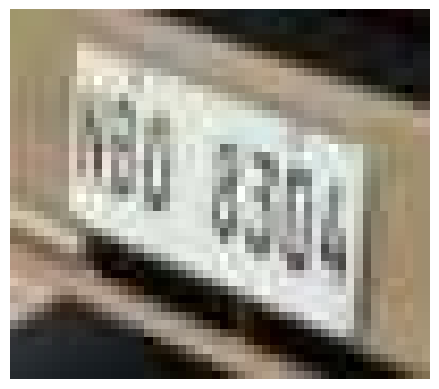

55 34
Saved low quality plate: data\low_qual/22.jpg


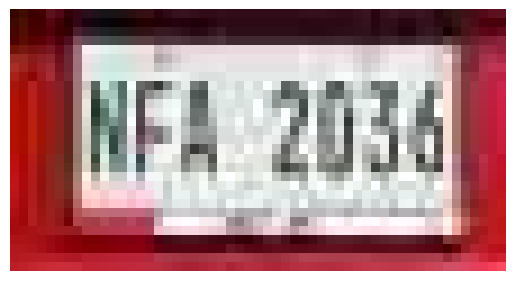

55 26
Saved low quality plate: data\low_qual/23.jpg


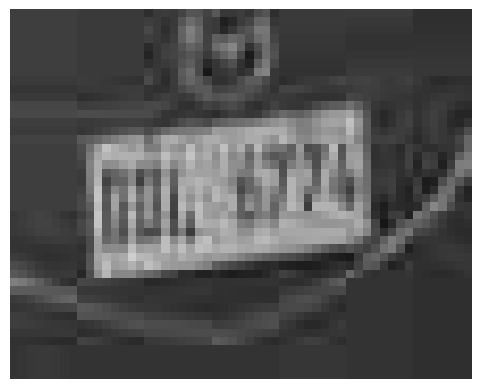

53 45
Saved low quality plate: data\low_qual/24.jpg


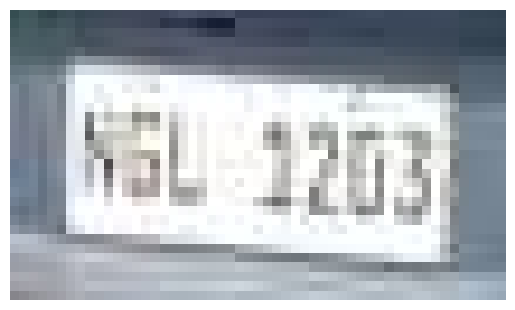

67 38
Saved low quality plate: data\low_qual/25.jpg


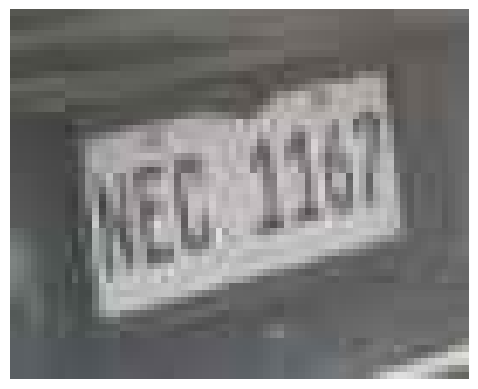

49 24
Saved low quality plate: data\low_qual/26.jpg


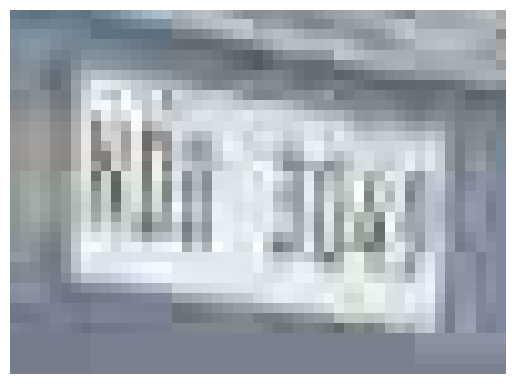

46 21
Saved low quality plate: data\low_qual/27.jpg


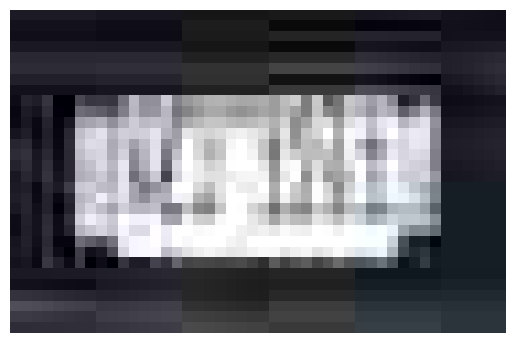

41 26
Saved low quality plate: data\low_qual/28.jpg


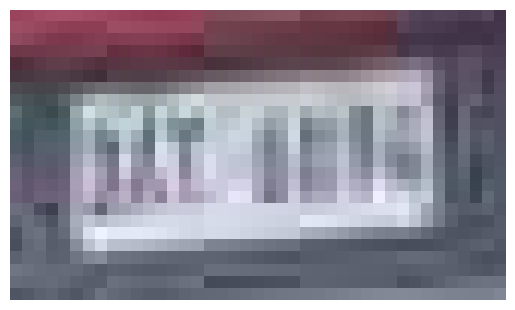

59 40
Saved low quality plate: data\low_qual/29.jpg


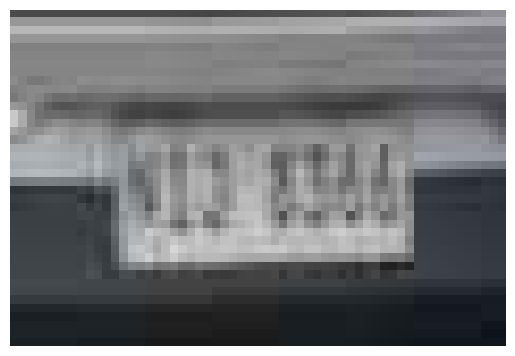

42 50
Saved low quality plate: data\low_qual/3.jpg


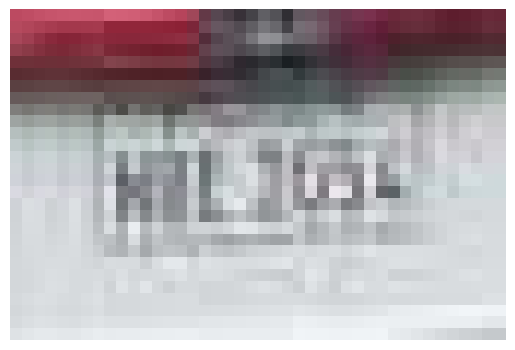

70 56
Saved low quality plate: data\low_qual/30.jpg


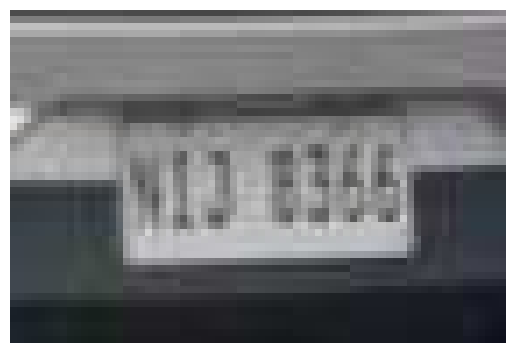

67 44
Saved low quality plate: data\low_qual/31.jpg


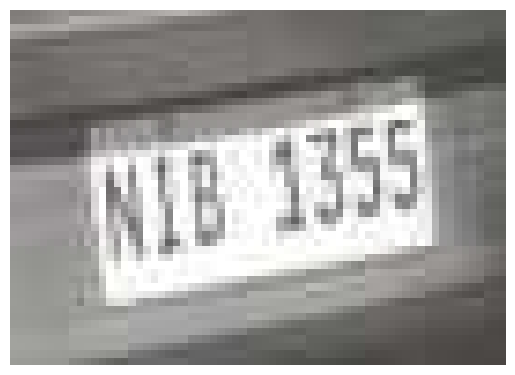

61 40
Saved low quality plate: data\low_qual/32.jpg


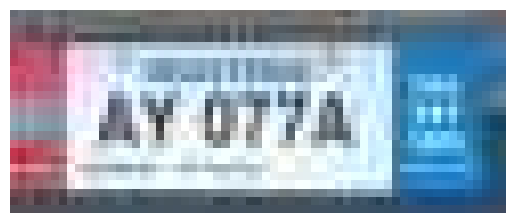

62 21
Saved low quality plate: data\low_qual/33.jpg


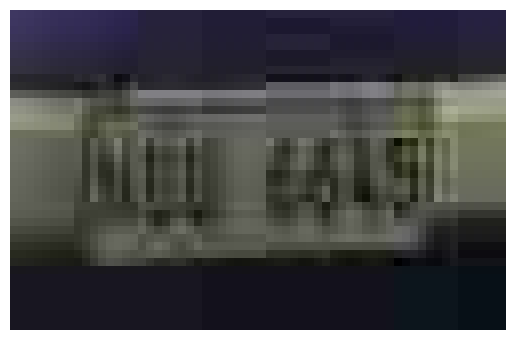

57 58
Saved low quality plate: data\low_qual/34.jpg


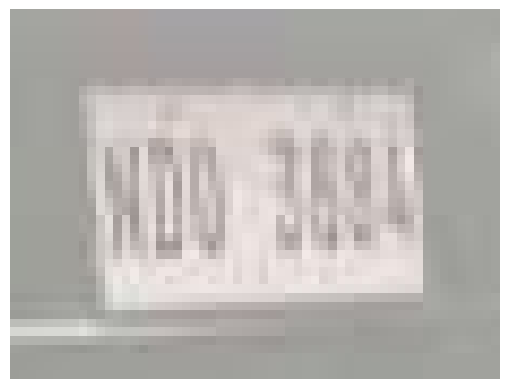

52 49
Saved low quality plate: data\low_qual/35.jpg


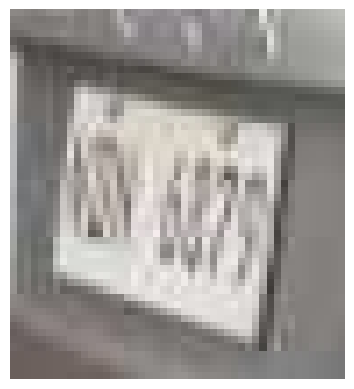

42 57
Saved low quality plate: data\low_qual/36.jpg


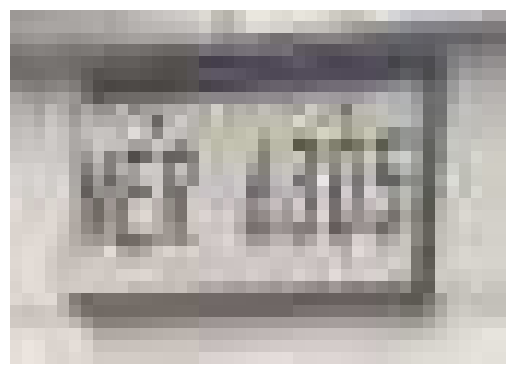

53 31
Saved low quality plate: data\low_qual/37.jpg


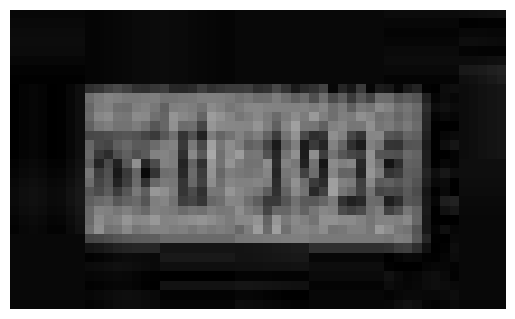

50 55
Saved low quality plate: data\low_qual/38.jpg


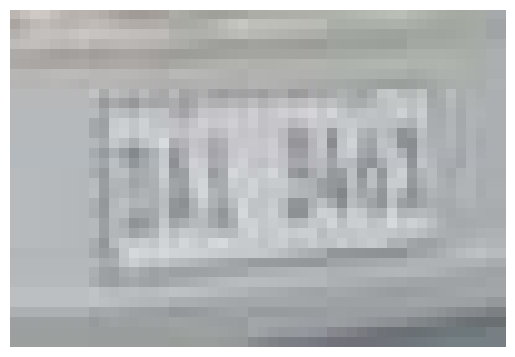

41 26
Saved low quality plate: data\low_qual/39.jpg


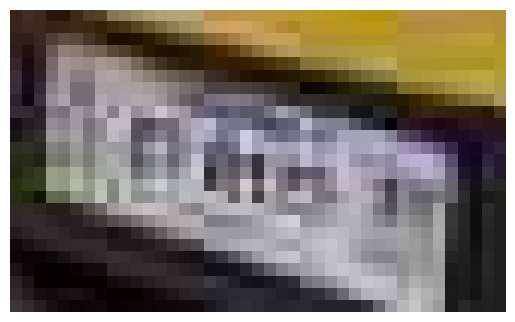

54 54
Saved low quality plate: data\low_qual/4.jpg


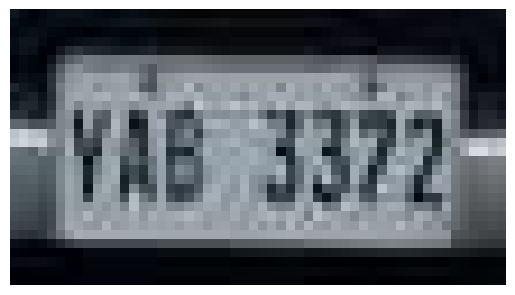

42 36
Saved low quality plate: data\low_qual/40.jpg


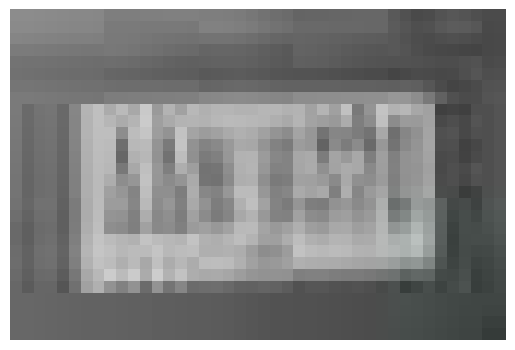

59 46
Saved low quality plate: data\low_qual/41.jpg


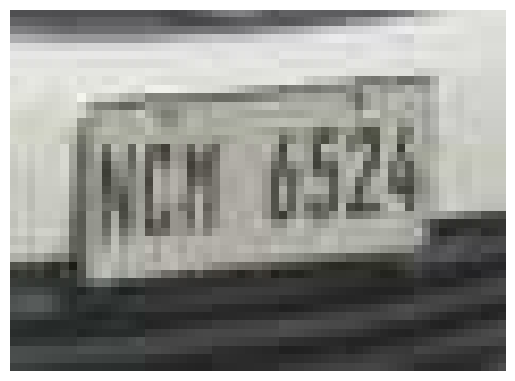

59 55
Saved low quality plate: data\low_qual/42.jpg


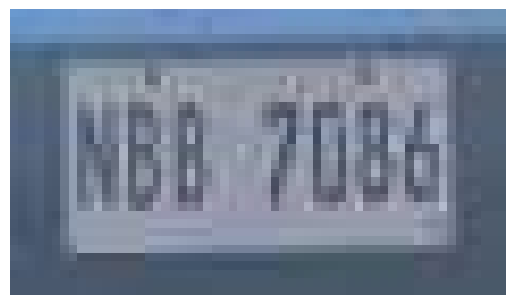

66 45
Saved low quality plate: data\low_qual/43.jpg


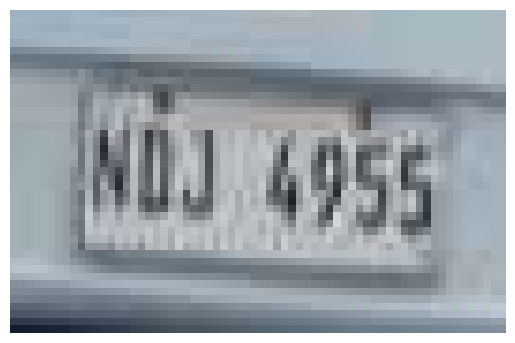

57 48
Saved low quality plate: data\low_qual/44.jpg


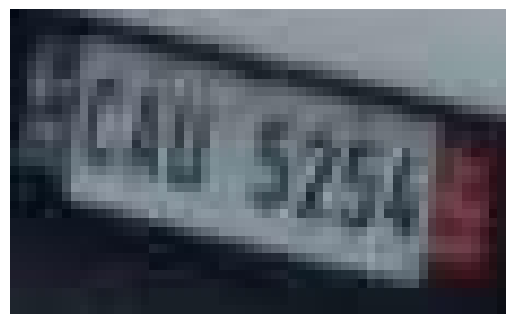

68 51
Saved low quality plate: data\low_qual/45.jpg


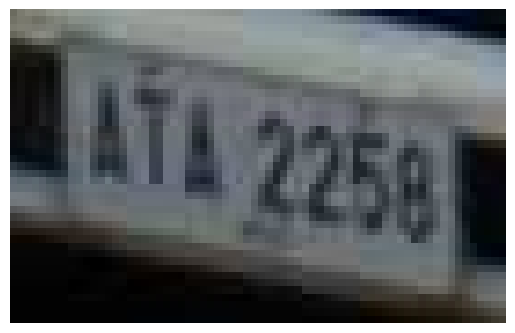

62 27
Saved low quality plate: data\low_qual/46.jpg


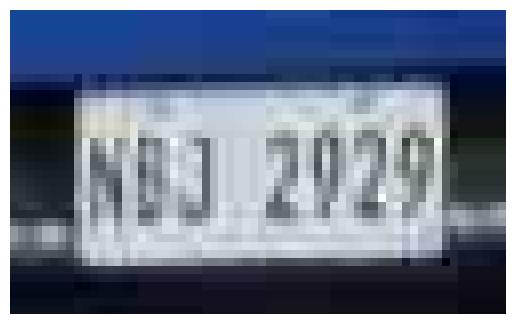

65 31
Saved low quality plate: data\low_qual/47.jpg


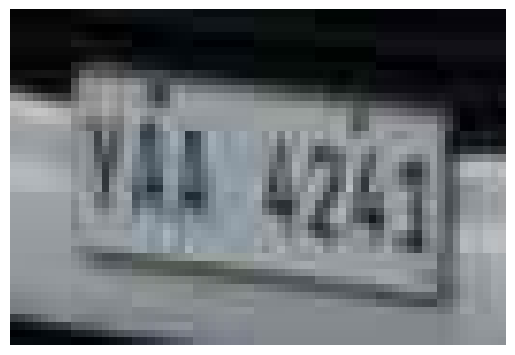

58 29
Saved low quality plate: data\low_qual/48.jpg


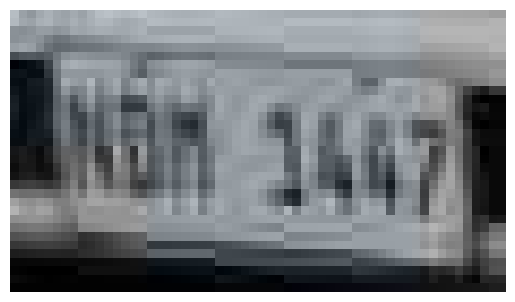

65 36
Saved low quality plate: data\low_qual/49.jpg


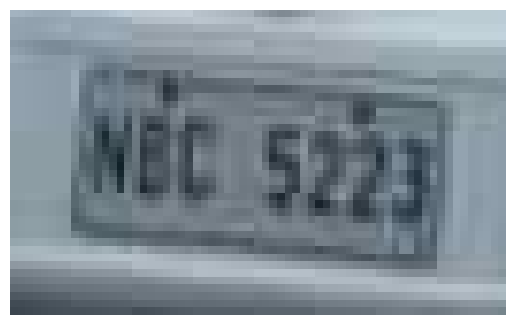

58 51
Saved low quality plate: data\low_qual/5.jpg


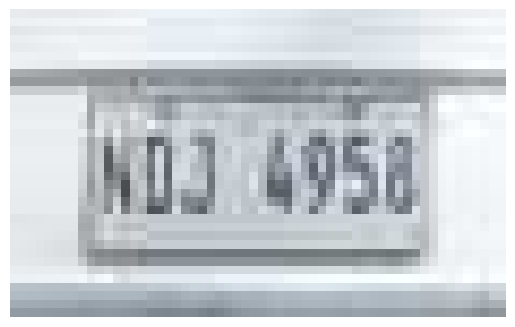

50 28
Saved low quality plate: data\low_qual/50.jpg


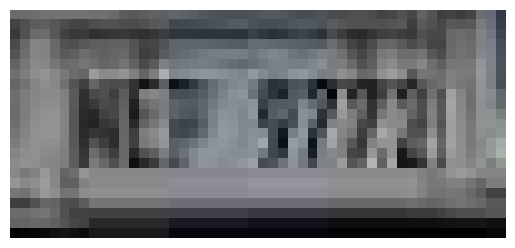

51 35
Saved low quality plate: data\low_qual/51.jpg


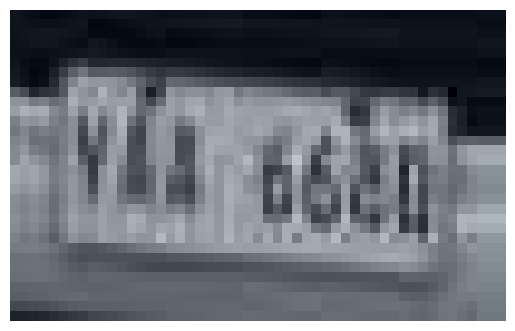

68 31
Saved low quality plate: data\low_qual/52.jpg


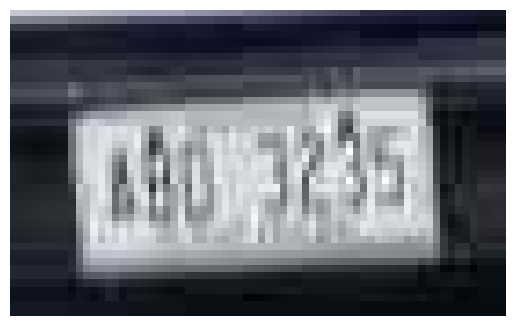

45 24
Saved low quality plate: data\low_qual/53.jpg


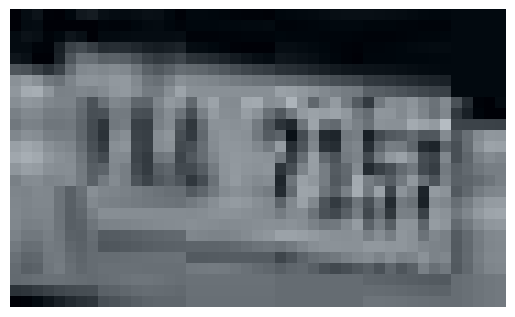

48 43
Saved low quality plate: data\low_qual/54.jpg


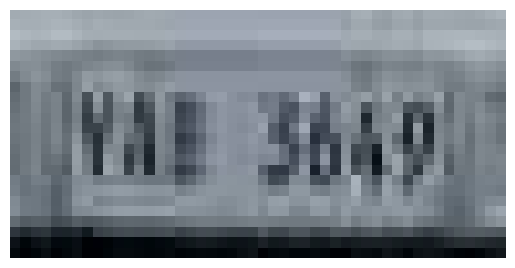

45 23
Saved low quality plate: data\low_qual/55.jpg


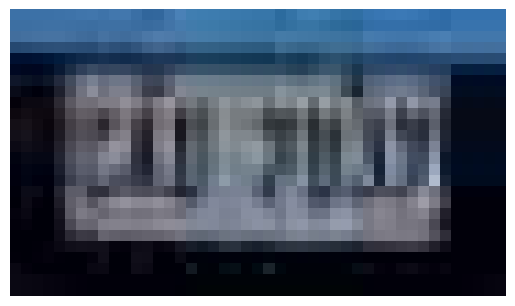

55 25
Saved low quality plate: data\low_qual/56.jpg


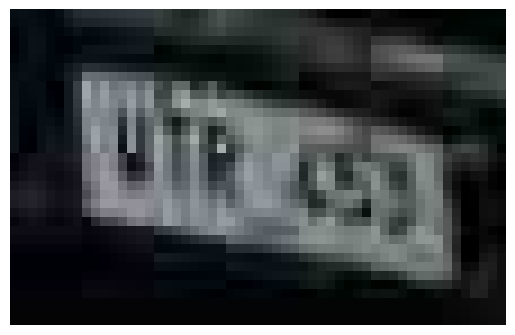

40 20
Saved low quality plate: data\low_qual/57.jpg


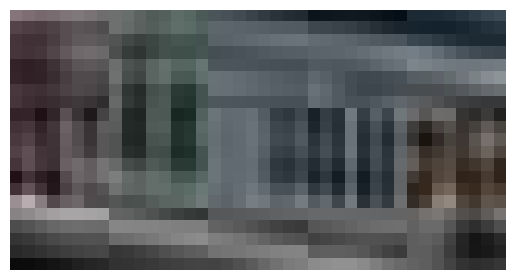

63 39
Saved low quality plate: data\low_qual/58.jpg


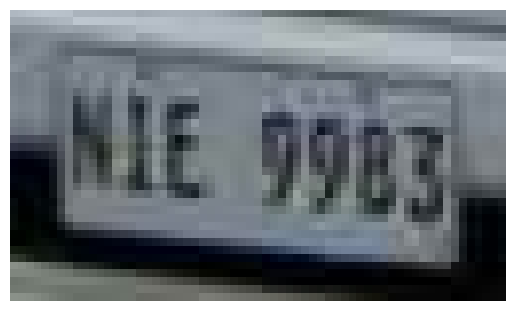

53 42
Saved low quality plate: data\low_qual/59.jpg


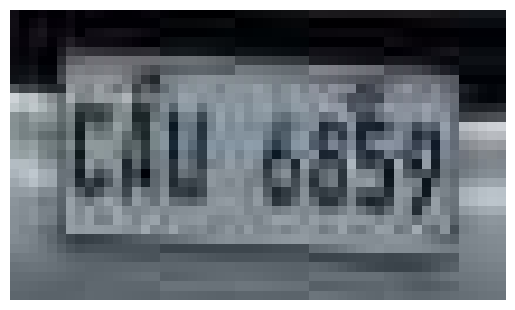

52 20
Saved low quality plate: data\low_qual/6.jpg


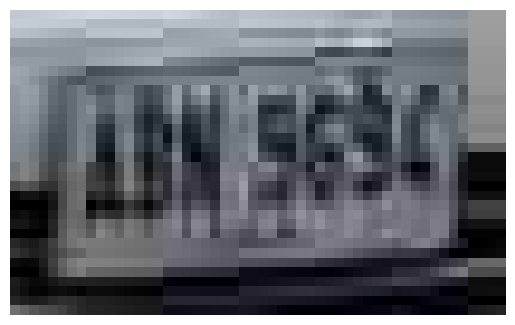

53 28
Saved low quality plate: data\low_qual/60.jpg


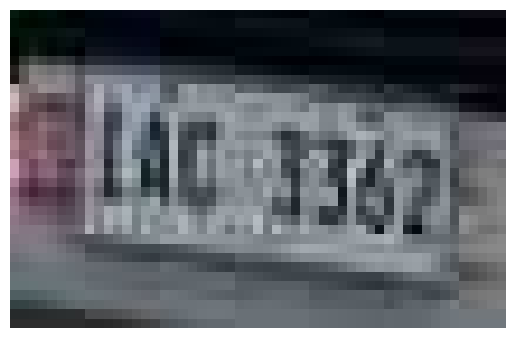

53 21
Saved low quality plate: data\low_qual/61.jpg


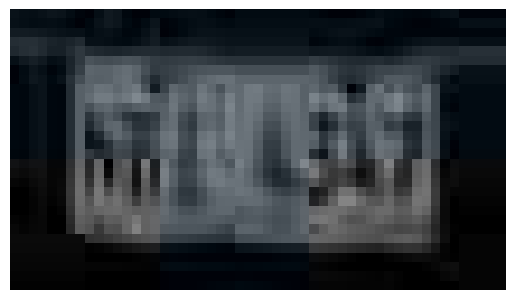

42 24
Saved low quality plate: data\low_qual/62.jpg


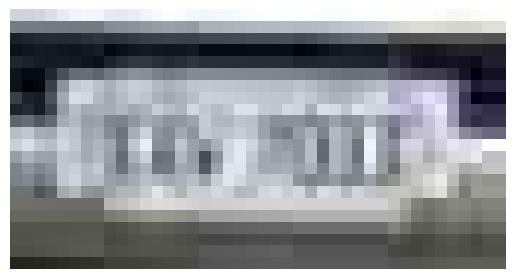

59 49
Saved low quality plate: data\low_qual/7.jpg


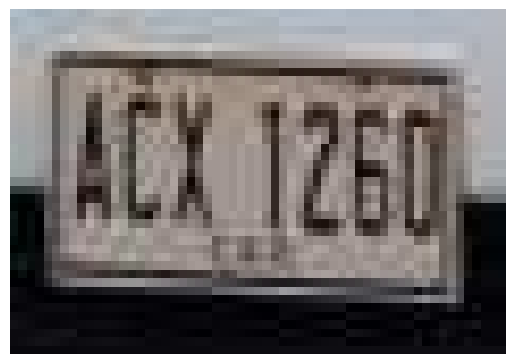

58 53
Saved low quality plate: data\low_qual/8.jpg


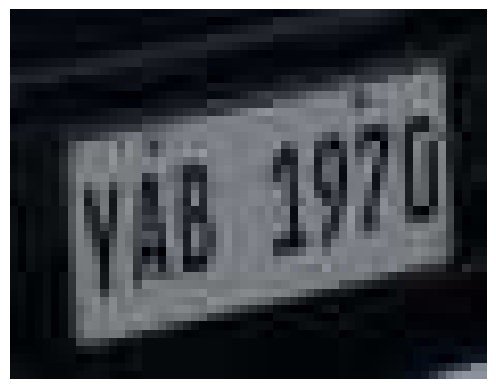

40 41
Saved low quality plate: data\low_qual/9.jpg


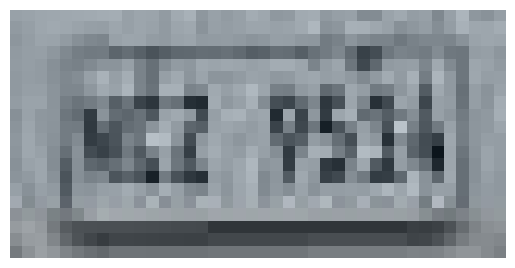

In [643]:
for image_name in files:
    img = cv2.imread(os.path.join(in_dir, image_name))
    res = random.randint(min_rs, max_rs)
    qual = random.randint(min_qual, max_qual)
    print(res, qual)

    low_res_img = degrade_image(img, max_res=res, jpeg_quality=qual)

    filename = f'{out_dir}/{image_name}'
    cv2.imwrite(filename, low_res_img)
    print(f'Saved low quality plate: {filename}')
    
    plt.imshow(cv2.cvtColor(low_res_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()